In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [13]:
url = r"..\data\clean\merged_clean_owen2.csv"
df = pd.read_csv(url)
df_Amir=df.copy()

Amirreza part start

In [8]:
#finding the average price to divide the dataset into two groups, higher than average and lower than average.
print('the average price is' ,df_Amir.price_USD.mean())

# taking the average as the threshold and comparing the review_score average of the two groups.
threshold = 17.5
df_expensive = df_Amir[df_Amir['price_USD'] > threshold]
print("the average review score of more expensive games is ", df_expensive.review_score.mean())

threshold = 17
df_expensive = df_Amir[df_Amir['price_USD'] < threshold]
print("the average review score of cheaper games is ", df_expensive.review_score.mean())

# using median to divide the dataset into two groups. in this case median is a better choice than mean as the very high and very low amounts
#doesn't change it considerably.
print('the median review score is ', df_Amir.review_score.median())

# taking the median as the threshold and comparing the revenue average for the two groups.
review_threshold = 83
df_high_review = df_Amir[df_Amir['review_score'] > review_threshold]
print('the average revenue of games with higher than median review score is ', df_high_review.revenue.mean())

review_threshold = 83
df_high_review = df_Amir[df_Amir['review_score'] < review_threshold]
print('the average revenue of games with lower than median review score is ', df_high_review.revenue.mean())

the average price is 17.53978835978836
the average review score of more expensive games is  75.43358778625954
the average review score of cheaper games is  76.78296382730456
the median review score is  83.0
the average revenue of games with higher than median review score is  3322278.694698058
the average revenue of games with lower than median review score is  2017180.305640433


In [9]:
# Calculating the average revenue per genre
genres = ['Sports', 'Racing', 'Simulation', 'Action', 'Adventure', 'RPG']
genre_revenue_data = []
# Loop through each genre column
for genre in genres:
    # As the genre is boolean value, filter games where the genre is True
    genre_games = df_Amir[df_Amir[genre] == True]

    # Calculate the average revenue for the games in the genres
    avg_revenue = genre_games['revenue'].mean()

    # Count the number of games in the genres
    num_games = genre_games.shape[0]

    # Append the result to the list
    genre_revenue_data.append({'genre': genre, 'num_games': num_games, 'avg_revenue': avg_revenue})

# Convert the list to a DataFrame for easier plotting
genre_revenue_df = pd.DataFrame(genre_revenue_data)

# Display the resulting DataFrame
display(genre_revenue_df)

,genre,num_games,avg_revenue
0,Sports,46,1.131611e+06
1,Racing,31,1.146141e+06
2,Simulation,539,1.538958e+06
3,Action,568,5.708596e+06
4,Adventure,685,3.855070e+06
5,RPG,535,4.300139e+06


C:\Users\aurel\AppData\Local\Temp\ipykernel_36884\3263870789.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_revenue_df,


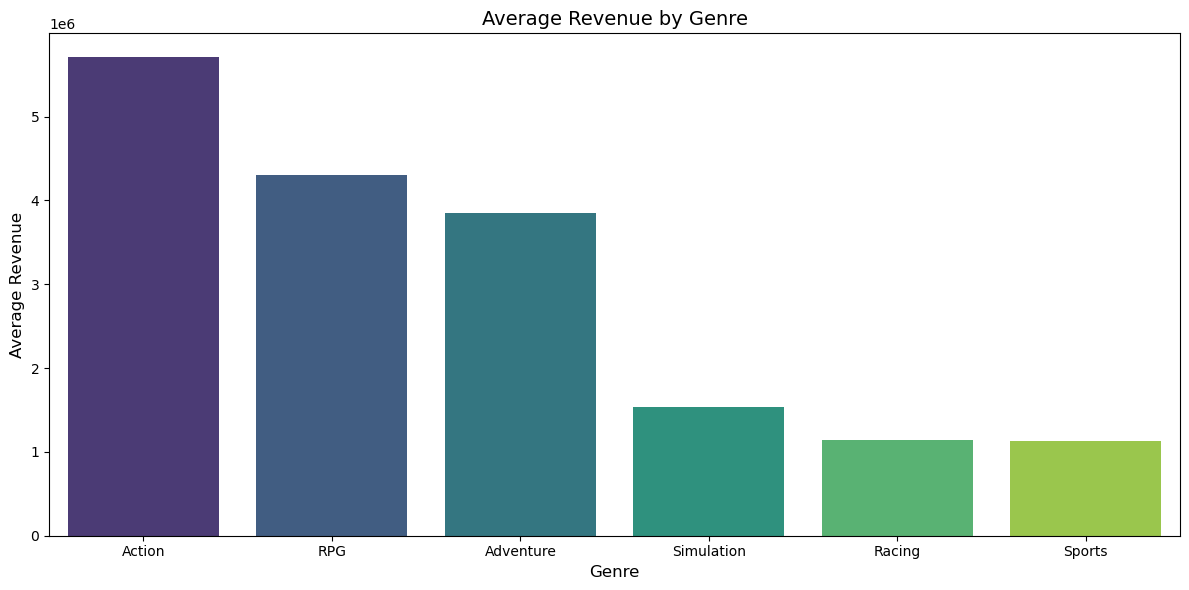

In [10]:
# Creating a bar chart based on the genre_revenue_df

# Sorting the dataframe in descending order

genre_revenue_df = genre_revenue_df.sort_values(by='avg_revenue', ascending=False)

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot using seaborn
sns.barplot(data=genre_revenue_df,
            x='genre',
            y='avg_revenue',
            palette='viridis')

# Add title and labels
plt.title('Average Revenue by Genre', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Revenue', fontsize=12)

# Show the plot
plt.tight_layout()
plt.savefig('average_revenue_by_genre.png', dpi=300)
plt.show()

publishers
Game Science                       8.377934e+08
Pocketpair                         3.923286e+08
Newnight                           2.170179e+08
PlayStation Publishing LLC         1.272213e+08
NEXON                              1.022448e+08
Eleventh Hour Games                9.772367e+07
The Fun Pimps Entertainment LLC    8.978193e+07
Stunlock Studios                   8.361474e+07
Keen Games GmbH                    5.759552e+07
Supergiant Games                   4.271855e+07
Name: revenue, dtype: float64

C:\Users\aurel\AppData\Local\Temp\ipykernel_36884\892605145.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


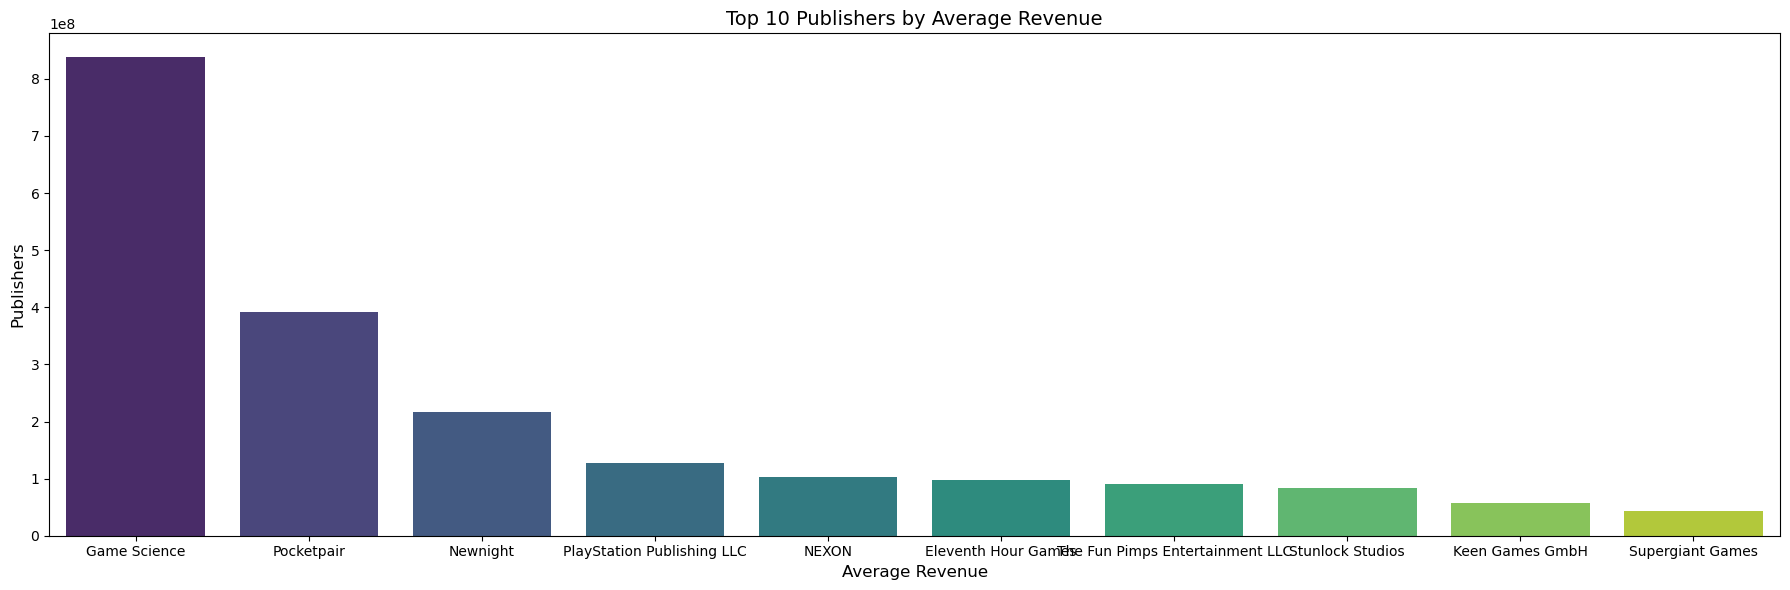

In [24]:
average_revenue_per_publisher = df_Amir.groupby('publishers')['revenue'].mean()
top_publishers = average_revenue_per_publisher.sort_values(ascending=False).head(10)
display(top_publishers)

# Visualizeing the top 10 publishers by average revenue

# Set up the plot
plt.figure(figsize=(18, 6))

# Plot the bar chart
sns.barplot(
    x=top_publishers.index,               # Publisher names
    y=top_publishers.values,              # Average revenue
    palette='viridis'                     # Color palette
)

# Add title and labels
plt.title('Top 10 Publishers by Average Revenue', fontsize=14)
plt.xlabel('Average Revenue', fontsize=12)
plt.ylabel('Publishers', fontsize=12)

# Display the plot
plt.tight_layout()
plt.savefig('top_10_publishers_by_average_revenue.png', dpi=300)
plt.show()


Aurélie part start

C:\Users\aurel\AppData\Local\Temp\ipykernel_36884\2321797911.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='revenue', data=top_5_revenue, palette='Set2')


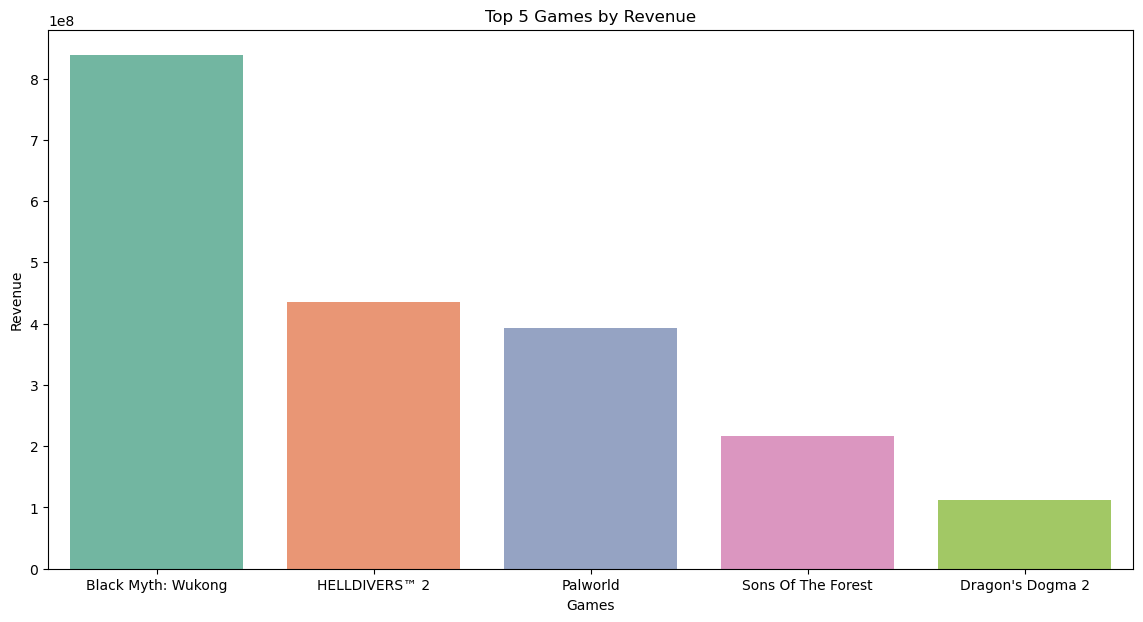

,name,revenue,genres
1462,Black Myth: Wukong,837793356.0,"Action, Adventure, RPG"
1463,HELLDIVERS™ 2,435635596.0,Action
1464,Palworld,392328553.0,"Action, Adventure, Indie, RPG, Early Access"
1465,Sons Of The Forest,217017892.0,"Action, Adventure, Indie, Simulation"
1466,Dragon's Dogma 2,111478291.0,"Action, RPG"


In [25]:
file = r"..\data\clean\merged_clean_owen2.csv"

df = pd.read_csv(file)
df_Aurel = df.copy()



# Top 5 Games revenu
top_5_revenue = df_Aurel.nlargest(5, 'revenue')

#dataviz top 5 games revenue
plt.figure(figsize=(14, 7))
sns.barplot(x='name', y='revenue', data=top_5_revenue, palette='Set2')
plt.title('Top 5 Games by Revenue')
plt.xlabel('Games')
plt.ylabel('Revenue')
plt.show()

top_5_revenue[['name', 'revenue', 'genres']]

In [26]:
# Top 5 by genre 
 
# Grouping and cleaning genre columns
df_Aurel['genres'] = df_Aurel['genres'].str.split(',')
df_Aurel = df_Aurel.explode('genres')
df_Aurel['genres'] = df_Aurel['genres'].str.strip()

# Translation of genres into English
translations = {
    'Бесплатные': 'Free To Play',
    'Инди': 'Indie',
    'Приключенческие игры': 'Adventure',
    'Ролевые игры': 'RPG',
    'Симуляторы': 'Simulation',
    'Стратегии': 'Strategy',
    'Экшены': 'Action'
}
df_Aurel['genres'] = df_Aurel['genres'].replace(translations)

# Find the top 5 games by revenue for each genre
top_5_genres = df_Aurel.groupby('genres').apply(lambda x: x.nlargest(5, 'revenue')).reset_index(drop=True)

# Limit to 5 games in each genre
genre_counts = df_Aurel['genres'].value_counts() 
valid_genres = genre_counts[genre_counts >= 5].index

# Dataviz of the result 
for genre in valid_genres:
    genre_df = top_5_genres[top_5_genres['genres'] == genre]
    print(f"Top 5 games revenue by genre: {genre}")
    print(genre_df[['name', 'revenue']])
    print("\n")

# commented the plot because to many graph
    # plt.figure(figsize=(14, 7))
    # sns.barplot(x='name', y='revenue', data=genre_df , palette='Set2')
    # plt.title(f'Top 5 games revenue by genre: {genre}')
    # plt.xlabel('games')
    # plt.ylabel('Revenue')
    # plt.show()


Top 5 games revenue by genre: Indie
                  name      revenue
29            Palworld  392328553.0
30  Sons Of The Forest  217017892.0
31          Last Epoch   97723674.0
32       7 Days to Die   89781931.0
33            Hades II   42718547.0


Top 5 games revenue by genre: Adventure
                   name      revenue
5    Black Myth: Wukong  837793356.0
6              Palworld  392328553.0
7    Sons Of The Forest  217017892.0
8  The First Descendant  102244808.0
9            Last Epoch   97723674.0


Top 5 games revenue by genre: Action
                 name      revenue
0  Black Myth: Wukong  837793356.0
1       HELLDIVERS™ 2  435635596.0
2            Palworld  392328553.0
3  Sons Of The Forest  217017892.0
4    Dragon's Dogma 2  111478291.0


Top 5 games revenue by genre: Simulation
                  name      revenue
49  Sons Of The Forest  217017892.0
50       7 Days to Die   89781931.0
51         Manor Lords   63098408.0
52          Once Human   34530561.0
53   Blade a

C:\Users\aurel\AppData\Local\Temp\ipykernel_36884\1957191695.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_genres = df_Aurel.groupby('genres').apply(lambda x: x.nlargest(5, 'revenue')).reset_index(drop=True)


top 5 revenue by genres         genres       revenue
0       Action  3.280383e+09
1    Adventure  2.675254e+09
11         RPG  2.335105e+09
9        Indie  1.459621e+09
13  Simulation  8.673986e+08


C:\Users\aurel\AppData\Local\Temp\ipykernel_36884\611836758.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genres', y='revenue', data=top_5_genres_revenue, palette='Set2')


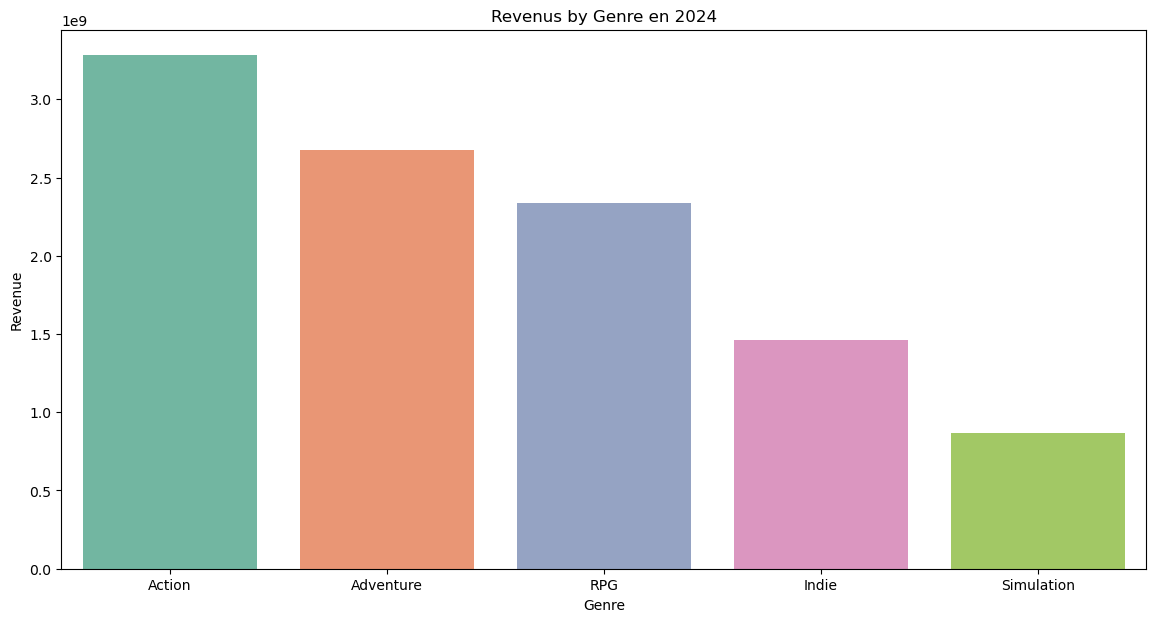

In [21]:
#game trend 2024

# Aggregate income by gender
revenue_by_genre = df_Aurel.groupby('genres')['revenue'].sum().reset_index()
top_genre = revenue_by_genre.loc[revenue_by_genre['revenue'].idxmax()]

# Limit to 5 genres with the highest revenue
top_5_genres_revenue = revenue_by_genre.nlargest(5, 'revenue')
print("top 5 revenue by genres",top_5_genres_revenue)


# Revenue visualization by gender for the year 2024
plt.figure(figsize=(14, 7))
sns.barplot(x='genres', y='revenue', data=top_5_genres_revenue, palette='Set2')
plt.title('Revenus by Genre en 2024')
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.show()

In [27]:
# Load the dataset
df2 = df.copy()

# 1. Correlation between Release Time and Revenue
# Question 1: Do games that come out during steam sales have a better chance of generating higher revenue?

# Define all Steam sales periods from January to September
def get_steam_sales_dates(): 
    sales = { 
             "Economy & Capitalism Fest": ["2024-01-08", "2024-01-15"], 
             "Pirates & Ninjas Fest": ["2024-01-22", "2024-01-29"], 
             "Neo Fest": ["2024-02-05", "2024-02-12"], 
             "Remote Play Together Fest": ["2024-02-12", "2024-02-19"], 
             "Dinosaures & Robots Fest": ["2024-02-26", "2024-03-04"], 
             "Spring sales": ["2024-03-14", "2024-03-21"], 
             "Deck constructor Fest": ["2024-03-25", "2024-04-01"], 
             "FPS Fest": ["2024-04-15", "2024-04-22"], 
             "Farming Fest": ["2024-04-29", "2024-05-06"], 
             "Games with infinite replayability Fest": ["2024-05-13", "2024-05-20"], 
             "Survival games Fest": ["2024-05-27", "2024-06-03"], 
             "Neo Fest (june)": ["2024-06-10", "2024-06-17"], 
             "Summer sales": ["2024-06-27", "2024-07-11"], 
             "Tower Defense Fest": ["2024-07-29", "2024-08-05"], 
             "Fighting Games Fest": ["2024-08-05", "2024-08-12"], 
             "Rhythm Fest 2024": ["2024-08-16", "2024-08-26"], 
             "Space Exploration Fest": ["2024-09-02", "2024-09-09"] 
             } 
    return sales



steam_sales = get_steam_sales_dates() 


def is_in_period(date, periods): 
    for start, end in periods.values(): 
        if start <= date <= end: 
            return True 
    return False

# # Add new column to the DataFrame for Steam sales
df2['is_steam_sale'] = df2['release_date'].apply(lambda x: is_in_period(x, steam_sales)) 


# Convert 'release_date' to datetime format
df2['release_date'] = pd.to_datetime(df2['release_date']) 

# Get the top 5 highest grossing games released during Steam sales
top_5_steam_sales = df2[df2['is_steam_sale']].nlargest(5, 'revenue')[['name', 'revenue']] 

# Get the top 5 highest grossing games released outside of Steam sales
top_5_non_sales = df2[~df2['is_steam_sale']].nlargest(5, 'revenue')[['name', 'revenue']]

# Calculate the mean revenue for games released during and outside of Steam sales
mean_revenue_steam_sales = df2[df2['is_steam_sale']]['revenue'].mean() 
mean_revenue_non_sales = df2[~df2['is_steam_sale']]['revenue'].mean() 

# Calculate the overall average revenue
overall_mean_revenue = df2['revenue'].mean()

# Print the results
print("Top 5 highest grossing games released during the Steam Sale:") 
print(top_5_steam_sales) 
print("\nTop 5 highest grossing games released out of the Steam Sale:") 
print(top_5_non_sales) 
print(f"\nMean revenue of game released during Steam Sale : {mean_revenue_steam_sales:.2f}") 
print(f"Mean revenue of game released out of Steam Sale : {mean_revenue_non_sales:.2f}")
print(f"Overall mean revenue: {overall_mean_revenue:.2f}")

Top 5 highest grossing games released during the Steam Sale:
                      name      revenue
1462    Black Myth: Wukong  837793356.0
1463         HELLDIVERS™ 2  435635596.0
1466      Dragon's Dogma 2  111478291.0
1467  The First Descendant  102244808.0
1472            Enshrouded   57595515.0

Top 5 highest grossing games released out of the Steam Sale:
                    name      revenue
1464            Palworld  392328553.0
1465  Sons Of The Forest  217017892.0
1468          Last Epoch   97723674.0
1469       7 Days to Die   89781931.0
1470            V Rising   83614738.0

Mean revenue of game released during Steam Sale : 3052255.50
Mean revenue of game released out of Steam Sale : 2188118.62
Overall mean revenue: 2615043.39


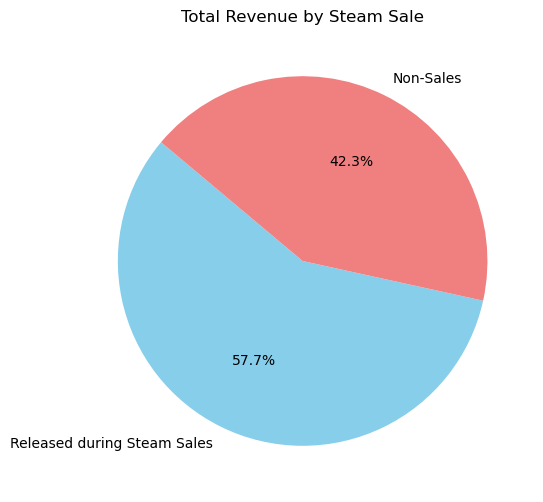

In [28]:
# Calculate total revenue for each group
total_revenue_steam_sales = df2[df2['is_steam_sale']]['revenue'].sum()
total_revenue_non_sales = df2[~df2['is_steam_sale']]['revenue'].sum()

# List of total revenues
total_revenues = [total_revenue_steam_sales, total_revenue_non_sales]

# Create a list of labels
labels = ['Released during Steam Sales', 'Non-Sales']

# Create a pie chart with Seaborn
plt.figure(figsize=(8, 6))
plt.pie(total_revenues, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Total Revenue by Steam Sale')
plt.show()

C:\Users\aurel\AppData\Local\Temp\ipykernel_36884\3116465646.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='revenue', data=top_5_steam_sales, label='Top 5 Steam Sales', palette='Set2')


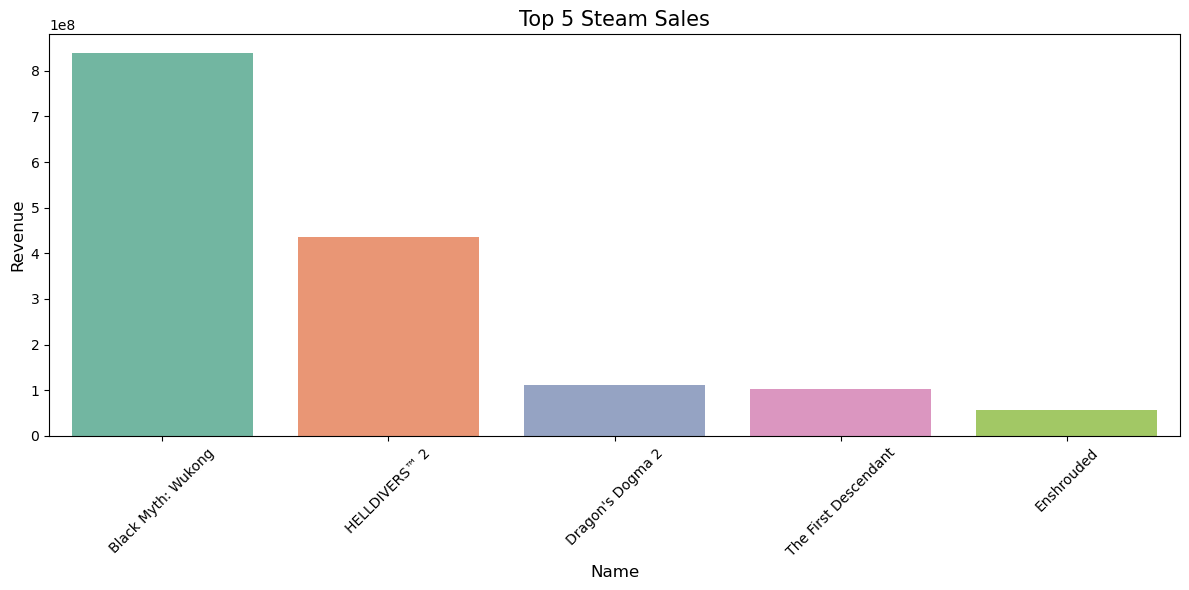

In [29]:
# Add the top 5 highest grossing games DURING Steam Sales

plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='revenue', data=top_5_steam_sales, label='Top 5 Steam Sales', palette='Set2')
plt.title('Top 5 Steam Sales', fontsize=15)
plt.xlabel('Name', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\aurel\AppData\Local\Temp\ipykernel_36884\787724760.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='revenue', data=top_5_non_sales, label='Top 5 Non-Sales', palette='Set2')


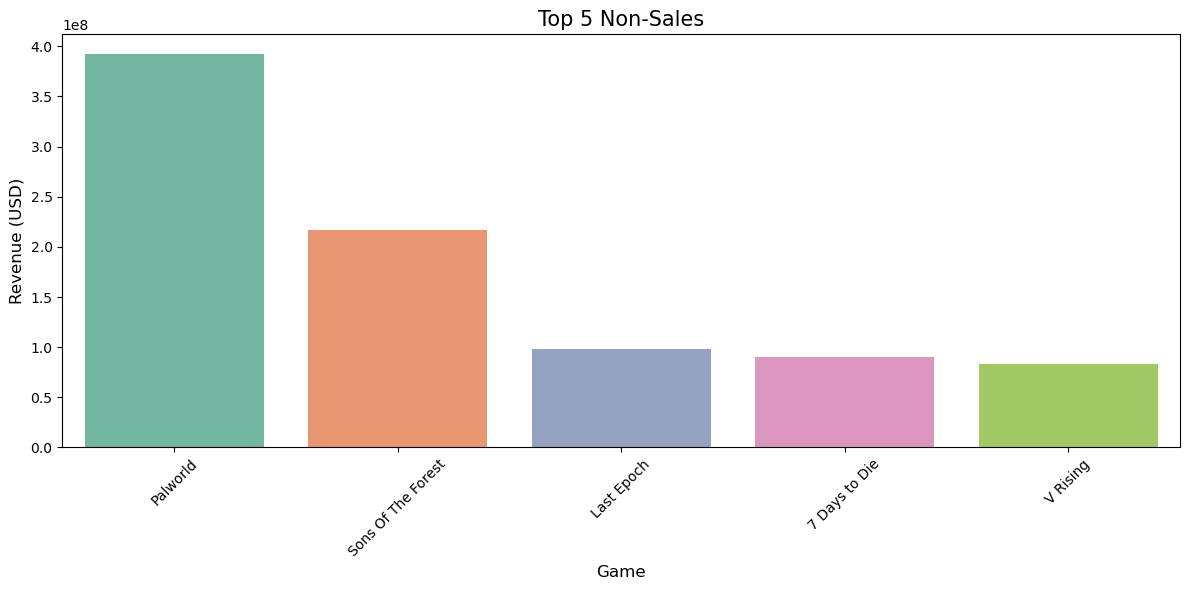

In [30]:
# Add the top 5 highest grossing games OUT of Steam Sales
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='revenue', data=top_5_non_sales, label='Top 5 Non-Sales', palette='Set2')
plt.title('Top 5 Non-Sales', fontsize=15)
plt.xlabel('Game', fontsize=12)
plt.ylabel('Revenue (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\aurel\AppData\Local\Temp\ipykernel_36884\4135936406.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y='Mean Revenue', data=plot_data, palette='Set2')


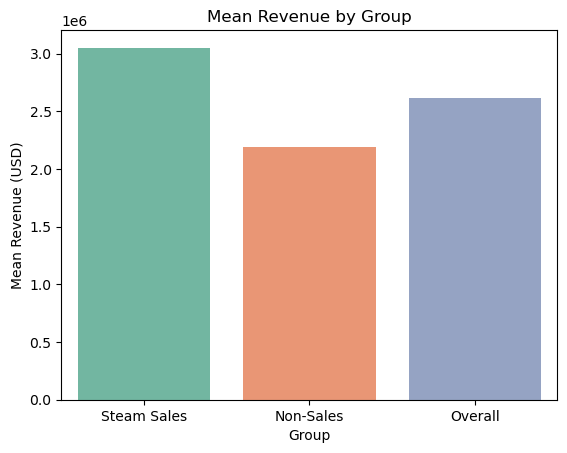

In [31]:
# Mean revenu by group (during steam sales, out of steam sales and overall)

# DataFrame for plotting
plot_data = pd.DataFrame({'Group': ['Steam Sales', 'Non-Sales', 'Overall'],
                           'Mean Revenue': [mean_revenue_steam_sales, mean_revenue_non_sales, overall_mean_revenue]})

# Mean revenue by group
sns.barplot(x='Group', y='Mean Revenue', data=plot_data, palette='Set2')
plt.title('Mean Revenue by Group')
plt.ylabel('Mean Revenue (USD)')
plt.show()

Owen part start

In [33]:
data = r"..\data\clean\merged_clean_owen2.csv"

df = pd.read_csv(data)

full_df = df.copy()
indie_df = df[(df['publisherClass'] == 'Indie')]

In [34]:
melt_by_genre = pd.melt(indie_df, id_vars=['name', 'revenue', 'copies_sold'],
                        value_vars=['Simulation', 'RPG', 'Racing', 'Massively Multiplayer', 'Action',
                                     'Free To Play', 'Adventure', 'Sports'],
                        var_name='genre', value_name='is_in_genre')

melt_by_genre = melt_by_genre[melt_by_genre['is_in_genre'] == True]

genre_summary = melt_by_genre.groupby('genre').agg(
    count=('name', 'count'),
    total_revenue=('revenue', 'sum'),
    avg_revenue_per_game= ('revenue', 'mean'),
    total_copies_sold = ('copies_sold', 'sum'),
    min_revenue=('revenue', 'min'),
    Q1_revenue=('revenue', lambda x: x.quantile(0.25)),
    median_revenue=('revenue', 'median'),
    Q3_revenue=('revenue', lambda x: x.quantile(0.75)),
    max_revenue=('revenue', 'max')
).reset_index()

genre_summary['avg_rev_per_copy_sold'] = genre_summary['total_revenue'] / genre_summary['total_copies_sold']

genre_summary = genre_summary.sort_values(by=['total_revenue'], ascending=[False])

genre_summary

,genre,count,total_revenue,avg_revenue_per_game,total_copies_sold,min_revenue,Q1_revenue,median_revenue,Q3_revenue,max_revenue,avg_rev_per_copy_sold
1,Adventure,593,4.530540e+08,7.640034e+05,67845605,20922.000000,42253.00,88551.0,3.299600e+05,3.403074e+07,6.677721
0,Action,469,4.058550e+08,8.653625e+05,31176208,20922.000000,40218.00,97404.0,3.662110e+05,3.403074e+07,13.018100
6,Simulation,489,3.730953e+08,7.629762e+05,61419925,20723.000000,48929.00,111599.0,3.668700e+05,3.126669e+07,6.074500
4,RPG,483,3.494843e+08,7.235699e+05,29801050,21067.000000,45289.50,99105.0,3.562145e+05,3.126669e+07,11.727247
3,Massively Multiplayer,47,1.084814e+08,2.308115e+06,6329836,21162.000000,40041.50,175228.0,1.059547e+06,3.403074e+07,17.138107
2,Free To Play,58,8.839722e+07,1.524090e+06,46154947,21880.594799,49217.25,247688.0,1.443233e+06,1.568936e+07,1.915227
5,Racing,26,1.890430e+07,7.270885e+05,1017951,21606.000000,34457.25,105769.5,2.310392e+05,9.517954e+06,18.570934
7,Sports,35,1.629912e+07,4.656892e+05,1752060,20723.000000,44344.50,78067.0,8.317585e+05,2.449168e+06,9.302833


In [35]:
full_melt_by_genre = pd.melt(full_df, id_vars=['name', 'publisherClass', 'revenue', 'copies_sold'],
                        value_vars=['Simulation', 'RPG', 'Racing', 'Action',
                                     'Adventure', 'Sports'],
                        var_name='genre', value_name='is_in_genre')

full_melt_by_genre = full_melt_by_genre[full_melt_by_genre['is_in_genre'] == True]

full_genre_summary = full_melt_by_genre.groupby(['publisherClass','genre']).agg(
    count=('name', 'count'),
    total_revenue=('revenue', 'sum'),
    avg_revenue_per_game= ('revenue', 'mean'),
    total_copies_sold = ('copies_sold', 'sum'),
    min_revenue=('revenue', 'min'),
    Q1_revenue=('revenue', lambda x: x.quantile(0.25)),
    median_revenue=('revenue', 'median'),
    Q3_revenue=('revenue', lambda x: x.quantile(0.75)),
    max_revenue=('revenue', 'max')
).reset_index()

full_genre_summary['avg_rev_per_copy_sold'] = full_genre_summary['total_revenue'] / full_genre_summary['total_copies_sold']

full_genre_summary = full_genre_summary.sort_values(by=['genre','avg_revenue_per_game'], ascending=[True,False])

full_genre_summary

,publisherClass,genre,count,total_revenue,avg_revenue_per_game,total_copies_sold,min_revenue,Q1_revenue,median_revenue,Q3_revenue,max_revenue,avg_rev_per_copy_sold
6,AAA,Action,29,1.533627e+09,5.288369e+07,32784370,65173.0,667814.00,933938.0,4.747832e+06,837793356.0,46.779213
0,AA,Action,70,1.303000e+09,1.861429e+07,60333836,32016.0,330510.25,1079704.0,4.972556e+06,392328553.0,21.596511
13,Indie,Action,469,4.058550e+08,8.653625e+05,31176208,20922.0,40218.00,97404.0,3.662110e+05,34030740.0,13.018100
7,AAA,Adventure,16,9.023208e+08,5.639505e+07,16954076,54185.0,291554.75,705627.5,2.031779e+06,837793356.0,53.221464
1,AA,Adventure,76,1.285348e+09,1.691248e+07,58774182,20674.0,138905.75,748410.0,3.232552e+06,392328553.0,21.869271
14,Indie,Adventure,593,4.530540e+08,7.640034e+05,67845605,20922.0,42253.00,88551.0,3.299600e+05,34030740.0,6.677721
8,AAA,RPG,9,9.750582e+08,1.083398e+08,17852813,25991.0,178950.00,920024.0,2.295894e+07,837793356.0,54.616503
2,AA,RPG,42,9.759838e+08,2.323771e+07,43585475,22568.0,529679.50,1958128.0,8.920276e+06,392328553.0,22.392410
15,Indie,RPG,483,3.494843e+08,7.235699e+05,29801050,21067.0,45289.50,99105.0,3.562145e+05,31266686.0,11.727247
12,Hobbyist,RPG,1,4.787100e+04,4.787100e+04,3129,47871.0,47871.00,47871.0,4.787100e+04,47871.0,15.299137


In [36]:
indie_by_genre = pd.melt(indie_df, id_vars=['name', 'revenue', 'copies_sold'],
                        value_vars=['Simulation', 'RPG', 'Racing', 'Action',
                                     'Adventure', 'Sports'],
                        var_name='genre', value_name='is_in_genre')

indie_by_genre = indie_by_genre[indie_by_genre['is_in_genre'] == True]

indie_by_genre = indie_by_genre[['name', 'revenue', 'copies_sold', 'genre']]

full_by_genre = pd.melt(full_df, id_vars=['name', 'revenue', 'copies_sold'],
                        value_vars=['Simulation', 'RPG', 'Racing', 'Action',
                                     'Adventure', 'Sports'],
                        var_name='genre', value_name='is_in_genre')

full_by_genre = full_by_genre[full_by_genre['is_in_genre'] == True]

full_by_genre = full_by_genre[['name', 'revenue', 'copies_sold', 'genre']]

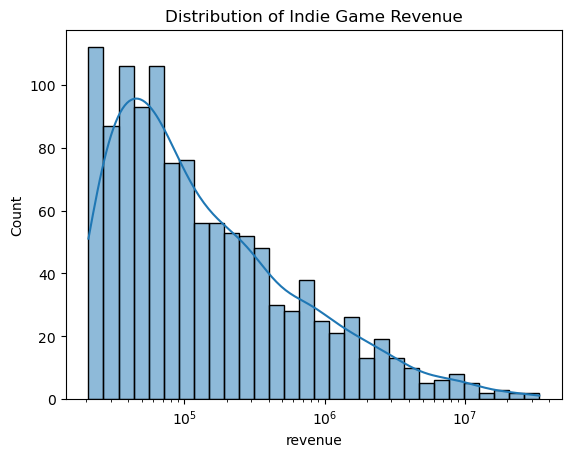

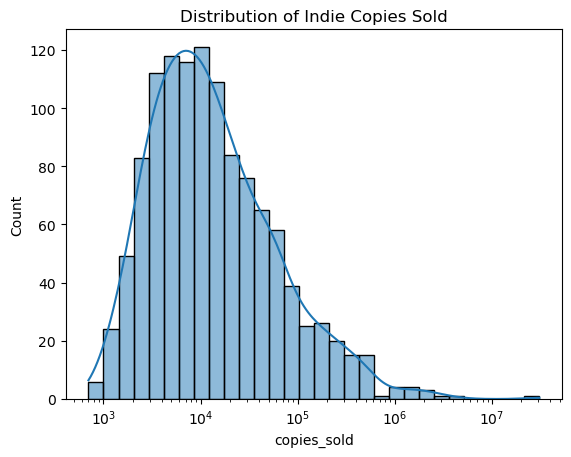

In [46]:
df_Owen = df.copy()

df_Owen = indie_by_genre[['name', 'revenue', 'copies_sold']].copy()
df_Owen = df_Owen.drop_duplicates(subset='name')

# Histogram for Indie Revenue and Copies Sold (log scale for better visualization)
sns.histplot(df_Owen['revenue'], kde=True, bins=30, log_scale=True)
plt.title('Distribution of Indie Game Revenue')
plt.savefig(r'..\figures\indie_revenue_distribution.png', format="png", dpi=300, bbox_inches='tight', transparent=False)
plt.show()

sns.histplot(df_Owen['copies_sold'], kde=True, bins=30, log_scale=True)
plt.title('Distribution of Indie Copies Sold')
plt.savefig(r'..\figures\indie_copies_sold_distribution.png', format="png", dpi=300, bbox_inches='tight', transparent=False)
plt.show()

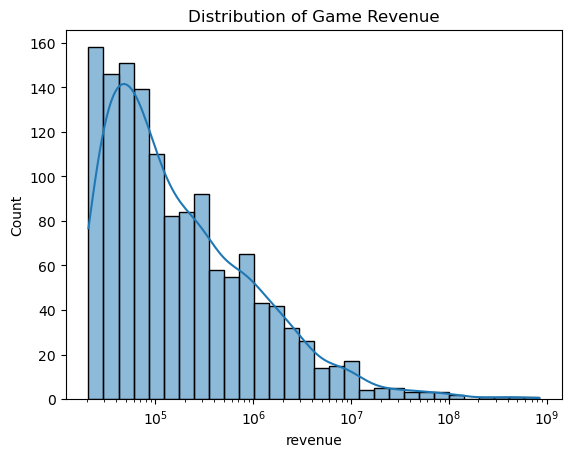

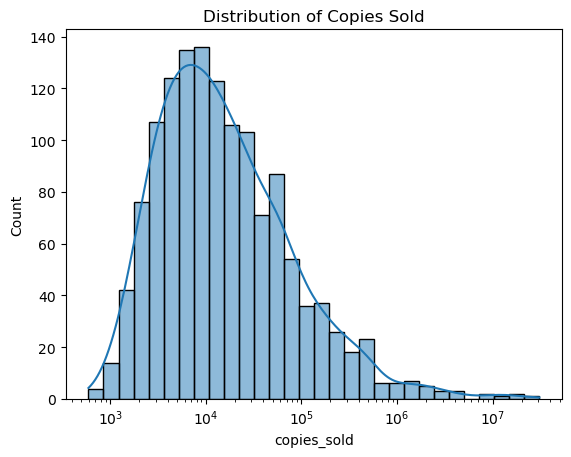

In [47]:
df_Owen = full_by_genre[['name', 'revenue', 'copies_sold']].copy()
df_Owen = df_Owen.drop_duplicates(subset='name')

# Histogram for Total Revenue and Copies Sold (log scale for better visualization)
sns.histplot(df_Owen['revenue'], kde=True, bins=30, log_scale=True)
plt.title('Distribution of Game Revenue')
plt.savefig(r'..\figures\game_revenue_distribution.png', format="png", dpi=300, bbox_inches='tight', transparent=False)
plt.show()

sns.histplot(df_Owen['copies_sold'], kde=True, bins=30, log_scale=True)
plt.title('Distribution of Copies Sold')
plt.savefig(r'..\figures\game_copies_sold_distribution.png', format="png", dpi=300, bbox_inches='tight', transparent=False)
plt.show()

C:\Users\aurel\AppData\Local\Temp\ipykernel_36884\297694044.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_performance.index, y=genre_performance['total_revenue'], palette='Set2')


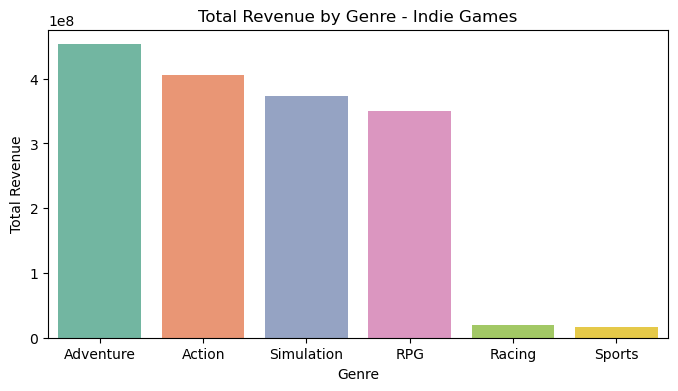

C:\Users\aurel\AppData\Local\Temp\ipykernel_36884\297694044.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_performance.index, y=genre_performance['avg_revenue'], palette='Set2')


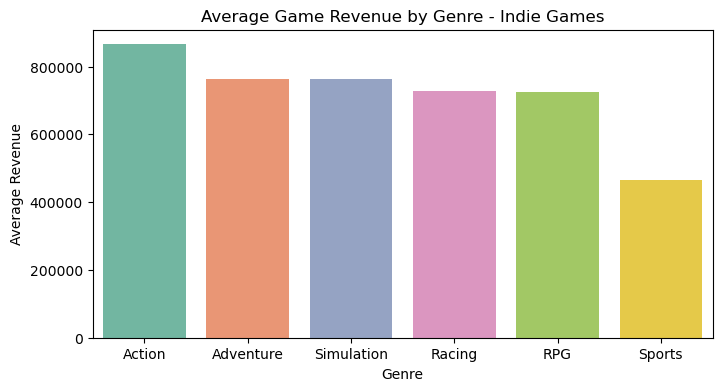

C:\Users\aurel\AppData\Local\Temp\ipykernel_36884\297694044.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_performance.index, y=genre_performance['med_revenue'], palette='Set2')


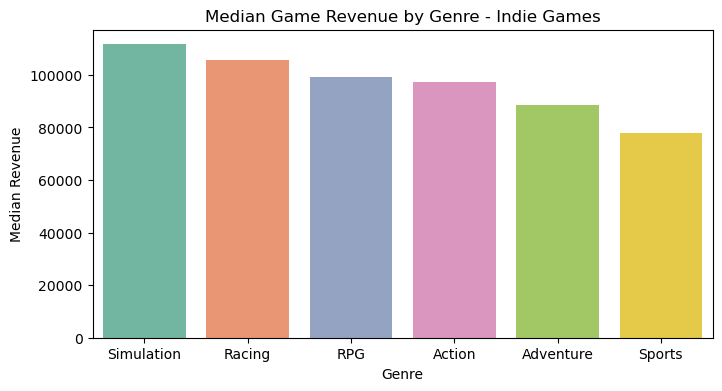

In [48]:
df_Owen = indie_by_genre[['name', 'genre', 'revenue', 'copies_sold']].copy()

genre_performance = df_Owen.groupby('genre').agg(
    total_revenue=('revenue', 'sum'),
    total_copies_sold=('copies_sold', 'sum'),
    count=('name', 'nunique')  # count of unique games per genre
).sort_values(by='total_revenue', ascending=False)

# Bar plots for total revenue by genre
plt.figure(figsize=(8, 4))
sns.barplot(x=genre_performance.index, y=genre_performance['total_revenue'], palette='Set2')
plt.title('Total Revenue by Genre - Indie Games')
plt.xlabel('Genre')
plt.ylabel('Total Revenue')
#plt.xticks(rotation=45)
plt.savefig(r'..\figures\indie_total_rev_by_genre.png', format="png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


genre_performance = df_Owen.groupby('genre').agg(
    avg_revenue=('revenue', 'mean'),
    avg_copies_sold=('copies_sold', 'mean'),
    count=('name', 'nunique')  # count of unique games per genre
).sort_values(by='avg_revenue', ascending=False)

# Bar plots for total revenue by genre
plt.figure(figsize=(8, 4))
sns.barplot(x=genre_performance.index, y=genre_performance['avg_revenue'], palette='Set2')
plt.title('Average Game Revenue by Genre - Indie Games')
plt.xlabel('Genre')
plt.ylabel('Average Revenue')
#plt.xticks(rotation=45)
plt.savefig(r'..\figures\indie_avg_rev_by_genre.png', format="png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

genre_performance = df_Owen.groupby('genre').agg(
    med_revenue=('revenue', 'median'),
    med_copies_sold=('copies_sold', 'median'),
    count=('name', 'nunique')  # count of unique games per genre
).sort_values(by='med_revenue', ascending=False)

# Bar plots for total revenue by genre
plt.figure(figsize=(8, 4))
sns.barplot(x=genre_performance.index, y=genre_performance['med_revenue'], palette='Set2')
plt.title('Median Game Revenue by Genre - Indie Games')
plt.xlabel('Genre')
plt.ylabel('Median Revenue')
#plt.xticks(rotation=45)
plt.savefig(r'..\figures\indie_med_rev_by_genre.png', format="png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

C:\Users\aurel\AppData\Local\Temp\ipykernel_36884\297694044.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_performance.index, y=genre_performance['total_revenue'], palette='Set2')


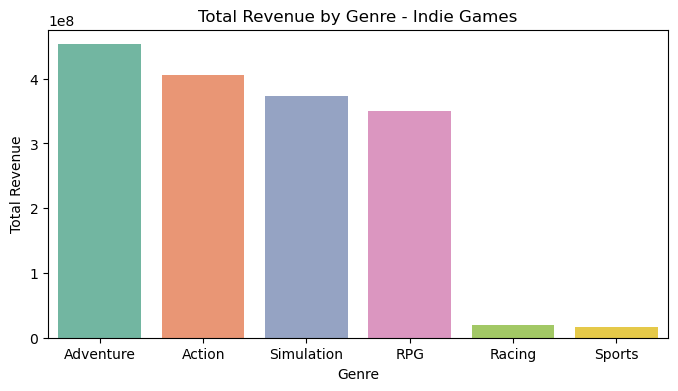

C:\Users\aurel\AppData\Local\Temp\ipykernel_36884\297694044.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_performance.index, y=genre_performance['avg_revenue'], palette='Set2')


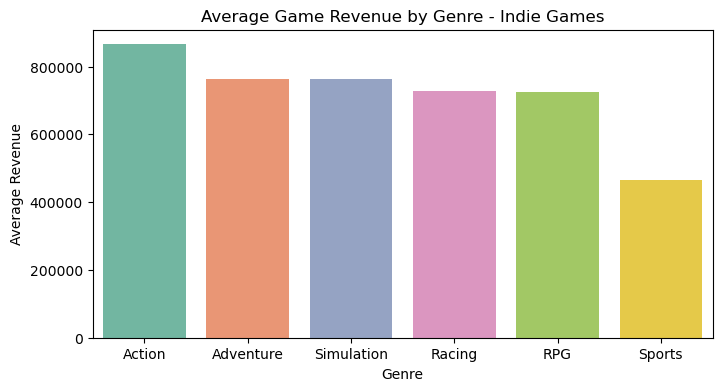

C:\Users\aurel\AppData\Local\Temp\ipykernel_36884\297694044.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_performance.index, y=genre_performance['med_revenue'], palette='Set2')


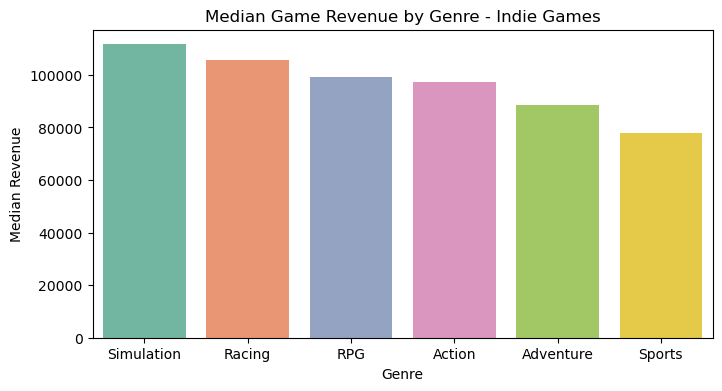

In [49]:
df_Owen = indie_by_genre[['name', 'genre', 'revenue', 'copies_sold']].copy()

genre_performance = df_Owen.groupby('genre').agg(
    total_revenue=('revenue', 'sum'),
    total_copies_sold=('copies_sold', 'sum'),
    count=('name', 'nunique')  # count of unique games per genre
).sort_values(by='total_revenue', ascending=False)

# Bar plots for total revenue by genre
plt.figure(figsize=(8, 4))
sns.barplot(x=genre_performance.index, y=genre_performance['total_revenue'], palette='Set2')
plt.title('Total Revenue by Genre - Indie Games')
plt.xlabel('Genre')
plt.ylabel('Total Revenue')
#plt.xticks(rotation=45)
plt.savefig(r'..\figures\indie_total_rev_by_genre.png', format="png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


genre_performance = df_Owen.groupby('genre').agg(
    avg_revenue=('revenue', 'mean'),
    avg_copies_sold=('copies_sold', 'mean'),
    count=('name', 'nunique')  # count of unique games per genre
).sort_values(by='avg_revenue', ascending=False)

# Bar plots for total revenue by genre
plt.figure(figsize=(8, 4))
sns.barplot(x=genre_performance.index, y=genre_performance['avg_revenue'], palette='Set2')
plt.title('Average Game Revenue by Genre - Indie Games')
plt.xlabel('Genre')
plt.ylabel('Average Revenue')
#plt.xticks(rotation=45)
plt.savefig(r'..\figures\indie_avg_rev_by_genre.png', format="png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

genre_performance = df_Owen.groupby('genre').agg(
    med_revenue=('revenue', 'median'),
    med_copies_sold=('copies_sold', 'median'),
    count=('name', 'nunique')  # count of unique games per genre
).sort_values(by='med_revenue', ascending=False)

# Bar plots for total revenue by genre
plt.figure(figsize=(8, 4))
sns.barplot(x=genre_performance.index, y=genre_performance['med_revenue'], palette='Set2')
plt.title('Median Game Revenue by Genre - Indie Games')
plt.xlabel('Genre')
plt.ylabel('Median Revenue')
#plt.xticks(rotation=45)
plt.savefig(r'..\figures\indie_med_rev_by_genre.png', format="png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [50]:
genre_melt = pd.melt(full_df, id_vars=['name', 'publisherClass', 'revenue', 'price_USD', 'copies_sold', 'Free To Play', 'In-App Purchases', 'Multi-player'],
                        value_vars=['Simulation', 'RPG', 'Racing', 'Action',
                                     'Adventure', 'Sports'],
                        var_name='genre', value_name='is_in_genre')

genre_melt = genre_melt[genre_melt['is_in_genre'] == True]

genre_melt = genre_melt[['name', 'genre','publisherClass', 'Free To Play', 'In-App Purchases', 'Multi-player','revenue', 'price_USD', 'copies_sold']]

genre_melt = genre_melt[genre_melt['publisherClass'] != 'Hobbyist']

genre_melt.head()

,name,genre,publisherClass,Free To Play,In-App Purchases,Multi-player,revenue,price_USD,copies_sold
0,WWE 2K24,Simulation,AAA,False,True,True,8055097.0,99.99,165301
2,Sins of a Solar Empire II,Simulation,Indie,False,False,True,7815247.0,49.99,214192
5,Soulmask,Simulation,Indie,False,False,True,7540563.0,29.99,304685
6,The Universim,Simulation,Indie,False,False,False,7534369.0,29.99,328945
7,Bellwright,Simulation,Indie,False,False,True,7481940.0,29.99,280955


In [51]:
genre_melt = pd.melt(full_df, id_vars=['name', 'publisherClass', 'revenue', 'price_USD', 'copies_sold', 'Free To Play', 'In-App Purchases', 'Multi-player'],
                        value_vars=['Simulation', 'RPG', 'Racing', 'Action',
                                     'Adventure', 'Sports'],
                        var_name='genre', value_name='is_in_genre')

genre_melt = genre_melt[genre_melt['is_in_genre'] == True]

genre_melt = genre_melt[['name', 'genre','publisherClass', 'Free To Play', 'In-App Purchases', 'Multi-player','revenue', 'price_USD', 'copies_sold']]

genre_melt = genre_melt[genre_melt['publisherClass'] != 'Hobbyist']

genre_melt.head()

,name,genre,publisherClass,Free To Play,In-App Purchases,Multi-player,revenue,price_USD,copies_sold
0,WWE 2K24,Simulation,AAA,False,True,True,8055097.0,99.99,165301
2,Sins of a Solar Empire II,Simulation,Indie,False,False,True,7815247.0,49.99,214192
5,Soulmask,Simulation,Indie,False,False,True,7540563.0,29.99,304685
6,The Universim,Simulation,Indie,False,False,False,7534369.0,29.99,328945
7,Bellwright,Simulation,Indie,False,False,True,7481940.0,29.99,280955


Ceci part start here

In [55]:
#filter for indie games by publisher class
data = r"..\data\clean\merged_clean_owen2.csv"

df = pd.read_csv(data)
new_indie_df = df[(df['publisherClass'] == 'Indie')]
new_indie_df.head()

,steamId,name,release_date,copies_sold,price_USD,price_local,revenue,avgPlaytime,publisherClass,publishers,...,Sports,Single-player,Multi-player,Steam Achievements,In-App Purchases,Partial Controller Support,Steam Cloud,Family Sharing,Full controller support,Steam Trading Cards
1,2291060,EARTH DEFENSE FORCE 6,2024-07-25,159806,59.99,£49.99,7882151.0,29.651061,Indie,D3PUBLISHER,...,False,True,True,True,False,False,True,True,True,False
2,1575940,Sins of a Solar Empire II,2024-08-15,214192,49.99,£41.99,7815247.0,12.452593,Indie,Stardock Entertainment,...,False,True,True,False,False,False,True,True,False,True
3,1859910,Legend of Mortal,2024-06-14,440998,19.99,£10.00,7756399.0,24.797817,Indie,"Paras Games, Obb Studio Inc.",...,False,True,False,True,False,False,True,True,True,False
5,2646460,Soulmask,2024-05-30,304685,29.99,£24.99,7540563.0,95.697813,Indie,Qooland Games,...,False,True,True,True,False,False,True,True,False,False
6,352720,The Universim,2024-01-22,328945,29.99,£22.99,7534369.0,16.868531,Indie,Crytivo,...,False,True,False,True,False,False,True,True,False,True


In [56]:
# Set pandas options to display all rows
pd.set_option('display.max_rows', None)

# Define the genres list
genres_list = ['Indie', 'Free to Play', 'Early Access', 'Simulation', 'Sports', 'Action',
               'Strategy', 'Adventure', 'RPG', 'Massively Multiplayer', 'Casual', 'Racing']

# Perform the melt operation for the genres of interest
melt_by_genre = pd.melt(new_indie_df,
                        id_vars=['name', 'revenue', 'copies_sold'],
                        value_vars=genres_list[2:], # Starting from index 3 to avoid 'Indie' and 'Free to Play'
                        var_name='genre', value_name='is_in_genre')

# Filter only the rows where the genre is present (True)
melt_by_genre = melt_by_genre[melt_by_genre['is_in_genre']]

# Generate summary statistics by genre
genre_summary = melt_by_genre.groupby('genre').agg(
    count=('name', 'count'),
    total_revenue=('revenue', 'sum'),
    avg_revenue_per_game=('revenue', 'mean'),
    total_copies_sold=('copies_sold', 'sum'),
    min_revenue=('revenue', 'min'),
    Q1_revenue=('revenue', lambda x: x.quantile(0.25)),
    median_revenue=('revenue', 'median'),
    Q3_revenue=('revenue', lambda x: x.quantile(0.75)),
    max_revenue=('revenue', 'max')
).reset_index()

# Calculate the average revenue per copy sold
genre_summary['avg_rev_per_copy_sold'] = genre_summary['total_revenue'] / genre_summary['total_copies_sold']

# Sort the summary by total revenue
genre_summary = genre_summary.sort_values(by=['total_revenue'], ascending=False)

# Display the final genre summary
print(genre_summary)

                   genre  count  total_revenue  avg_revenue_per_game  \
1              Adventure    593   4.530540e+08          7.640034e+05   
0                 Action    469   4.058550e+08          8.653625e+05   
7             Simulation    489   3.730953e+08          7.629762e+05   
5                    RPG    483   3.494843e+08          7.235699e+05   
9               Strategy    360   2.943444e+08          8.176233e+05   
2                 Casual    487   2.533871e+08          5.203021e+05   
3           Early Access    257   2.396121e+08          9.323429e+05   
4  Massively Multiplayer     47   1.084814e+08          2.308115e+06   
6                 Racing     26   1.890430e+07          7.270885e+05   
8                 Sports     35   1.629912e+07          4.656892e+05   

   total_copies_sold  min_revenue  Q1_revenue  median_revenue    Q3_revenue  \
1           67845605      20922.0    42253.00         88551.0  3.299600e+05   
0           31176208      20922.0    40218.00    

In [57]:
pd.reset_option('display.max_rows')

In [58]:
indie_by_genre = pd.melt(new_indie_df, id_vars=['name', 'revenue', 'copies_sold'],
                        value_vars=['Simulation', 'Sports', 'Action',
               'Strategy', 'Adventure', 'RPG', 'Massively Multiplayer', 'Casual', 'Racing'],
                        var_name='genre', value_name='is_in_genre')

indie_by_genre = indie_by_genre[indie_by_genre['is_in_genre'] == True]

indie_by_genre = indie_by_genre[['name', 'revenue', 'copies_sold', 'genre']]

indie_by_genre

,name,revenue,copies_sold,genre
1,Sins of a Solar Empire II,7815247.0,214192,Simulation
3,Soulmask,7540563.0,304685,Simulation
4,The Universim,7534369.0,328945,Simulation
5,Bellwright,7481940.0,280955,Simulation
6,Night of the Dead,7091792.0,394364,Simulation
...,...,...,...,...
11489,Hot & Lewd: Miami,21653.0,3903,Racing
11491,XF Extreme Formula,21606.0,1297,Racing
11579,MotoGP™24,954851.0,23431,Racing
11765,New Star GP,286736.0,16009,Racing


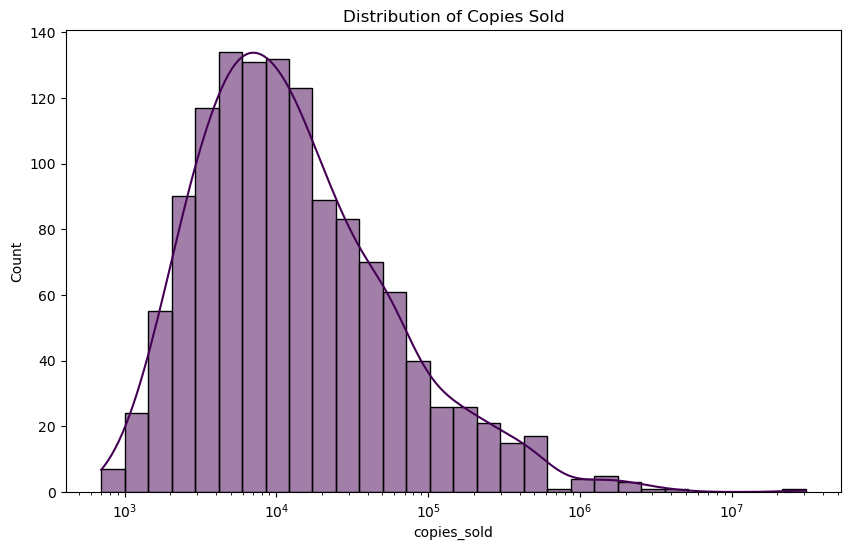

In [59]:
# Assuming 'indie_by_genre' DataFrame is already available
df = indie_by_genre[['name', 'revenue', 'copies_sold']].copy()
df = df.drop_duplicates(subset='name')

# Normalize the 'revenue' and 'copies_sold' columns to apply color mapping
norm_revenue = Normalize(vmin=df['revenue'].min(), vmax=df['revenue'].max())
norm_copies_sold = Normalize(vmin=df['copies_sold'].min(), vmax=df['copies_sold'].max())

# ScalarMappable to use 'viridis' colormap
cmap_revenue = ScalarMappable(norm=norm_revenue, cmap='viridis')
cmap_copies_sold = ScalarMappable(norm=norm_copies_sold, cmap='viridis')

# Apply color to each revenue and copies_sold
df['revenue_color'] = [cmap_revenue.to_rgba(x) for x in df['revenue']]
df['copies_sold_color'] = [cmap_copies_sold.to_rgba(x) for x in df['copies_sold']]

# Define the path where the figure should be saved
save_path = r'..\figures\game_copies_sold_distribution_cfgb.png'

# Ensure the directory exists
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Plotting Histogram for Copies Sold with log scale and viridis colormap
plt.figure(figsize=(10, 6))
sns.histplot(df['copies_sold'], kde=True, bins=30, log_scale=True, color=cmap_copies_sold.to_rgba(df['copies_sold'].mean()))  # Apply color based on average
plt.title('Distribution of Copies Sold')

# Save the figure with a transparent background
plt.savefig(save_path, format="png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

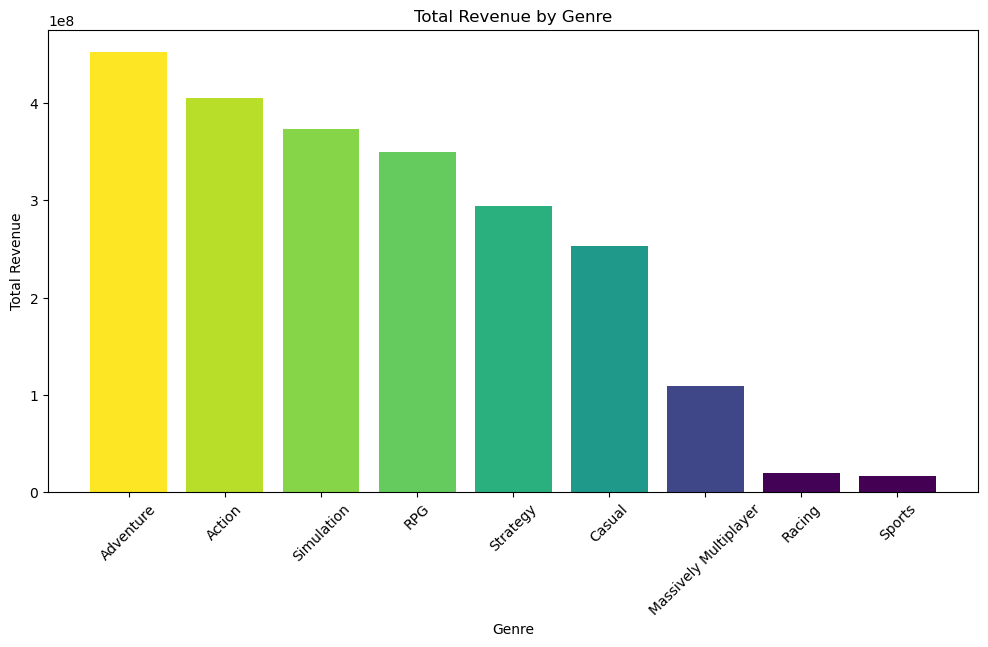

In [60]:

# Assuming `indie_by_genre` DataFrame is already available
df = indie_by_genre[['name', 'genre', 'revenue', 'copies_sold']].copy()

# Aggregating total revenue, total copies sold, and count by genre
genre_performance = df.groupby('genre').agg(
    total_revenue=('revenue', 'sum'),
    total_copies_sold=('copies_sold', 'sum'),
    count=('name', 'nunique')  # count of unique games per genre
).sort_values(by='total_revenue', ascending=False)

# Normalize total revenue for applying color scale
norm = Normalize(vmin=genre_performance['total_revenue'].min(), vmax=genre_performance['total_revenue'].max())
cmap = ScalarMappable(norm=norm, cmap='viridis')

# Plotting Bar plot for Total Revenue by Genre with viridis color map
plt.figure(figsize=(12, 6))

# Apply viridis colormap for bar colors based on total_revenue
bars = plt.bar(genre_performance.index, genre_performance['total_revenue'], color=[cmap.to_rgba(x) for x in genre_performance['total_revenue']])

# Add titles and labels
plt.title('Total Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

# Save the plot with a white background
plt.savefig(r'..\figures\indie_total_rev_by_genre_cfgb.png', format="png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


Index(['steamId', 'name', 'release_date', 'copies_sold', 'price_USD',
       'price_local', 'revenue', 'avgPlaytime', 'publisherClass', 'publishers',
       'developers', 'required_age', 'is_free', 'description',
       'about the game', 'languages', 'language_count', 'genres', 'categories',
       'estimated owners', 'peak ccu', 'metacritic score', 'review_score',
       'positive', 'negative', 'recommendations', 'average playtime forever',
       'average playtime two weeks', 'median playtime forever',
       'median playtime two weeks', 'Early Access', 'Strategy', 'Casual',
       'Simulation', 'RPG', 'Racing', 'Massively Multiplayer', 'Indie',
       'Action', 'Free To Play', 'Adventure', 'Sports', 'Single-player',
       'Multi-player', 'Steam Achievements', 'In-App Purchases',
       'Partial Controller Support', 'Steam Cloud', 'Family Sharing',
       'Full controller support', 'Steam Trading Cards'],
      dtype='object')
All playtime columns are present.


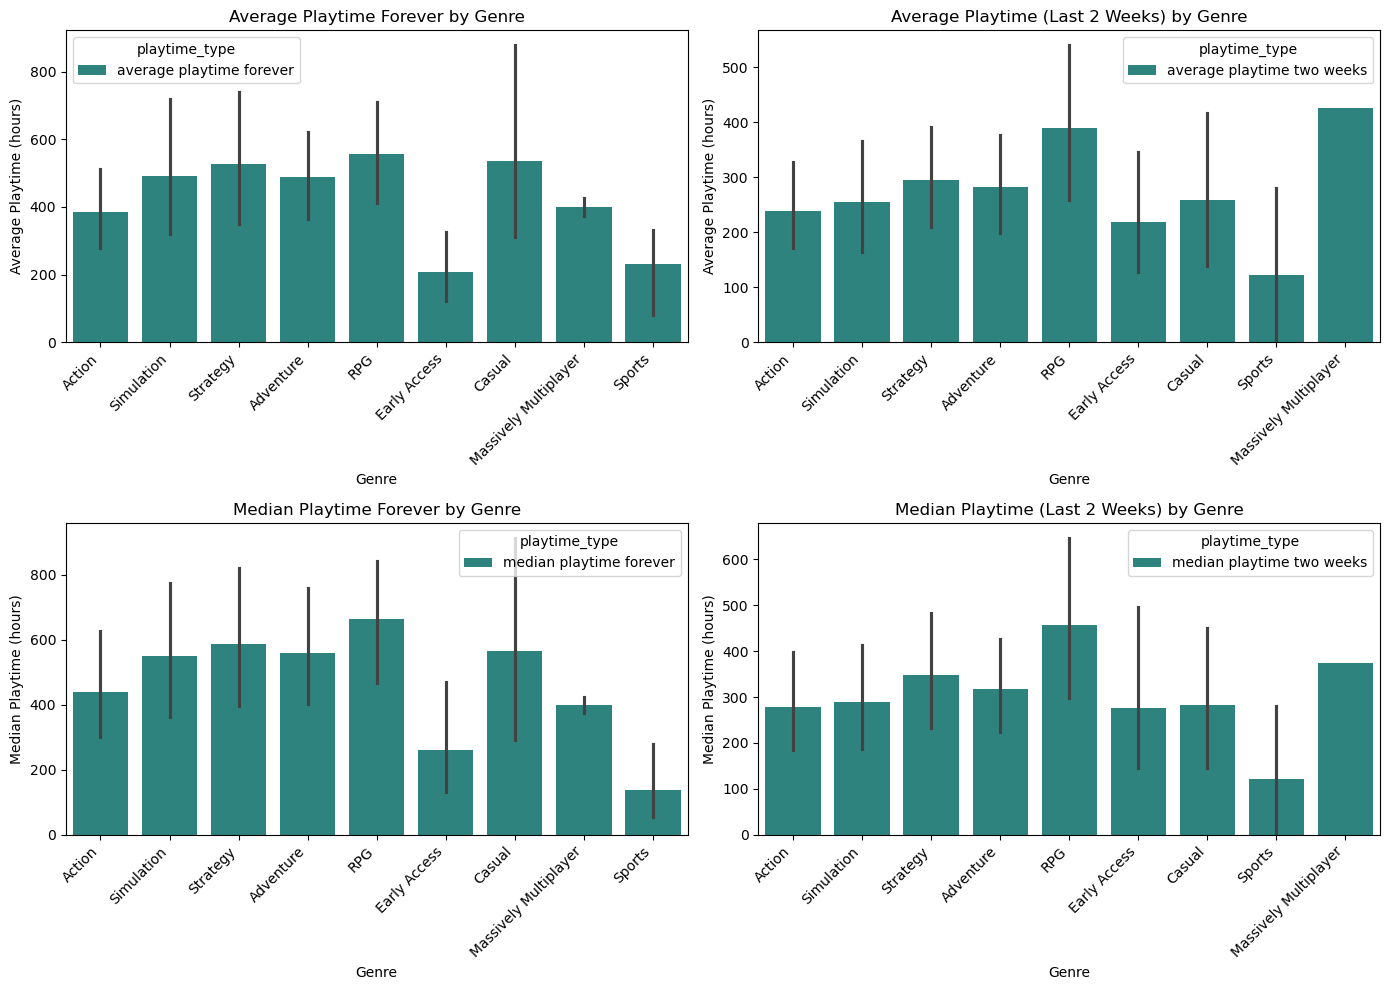

In [61]:
# Check the columns in indie_df to make sure we have the right playtime columns
print(indie_df.columns)

# List of playtime columns to be checked
playtime_columns = ['average playtime forever', 'average playtime two weeks',
                    'median playtime forever', 'median playtime two weeks']

# Check if the required columns exist in indie_df
missing_columns = [col for col in playtime_columns if col not in indie_df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All playtime columns are present.")

# Proceed if all columns are present
if not missing_columns:
    # Melt the DataFrame for each playtime column, creating a long-format DataFrame
    melted_df = indie_df.melt(id_vars=['name'],
                              value_vars=playtime_columns,
                              var_name='playtime_type',
                              value_name='playtime')

    # Filter out rows where 'playtime' is zero or missing
    melted_df = melted_df[melted_df['playtime'] > 0]  # Keep only rows where playtime > 0

    # Now, we need to map each game to its genres. This is a bit tricky since each game can belong to multiple genres.
    # Assuming you have genre columns where each genre is a separate column, we'll keep track of them.
    genre_columns = ['Early Access', 'Simulation', 'Sports', 'Action',
                     'Strategy', 'Adventure', 'RPG', 'Massively Multiplayer', 'Casual']

    # Create a new DataFrame with 'name' and the genre columns
    genre_df = indie_df[['name'] + genre_columns]  # Include the 'name' column here

    # Create a genre column that combines all genre columns (a one-hot encoding style)
    # Convert the genre columns into a single "genre" column with corresponding game names
    genre_melted = genre_df.melt(id_vars=['name'], var_name='genre', value_name='is_genre')

    # Only keep rows where 'is_genre' is 1, i.e., where the game belongs to the genre
    genre_melted = genre_melted[genre_melted['is_genre'] == 1]

    # Merge the playtime data with genre data based on the 'name' column
    merged_df = pd.merge(melted_df, genre_melted[['name', 'genre']], on='name', how='left')

    # Now, let's plot the data for each of the playtime variables for each genre
    plt.figure(figsize=(14, 10))

    # Plot for Average Playtime Forever
    plt.subplot(2, 2, 1)
    sns.barplot(x='genre', y='playtime', hue='playtime_type', data=merged_df[merged_df['playtime_type'] == 'average playtime forever'], palette='viridis')
    plt.title('Average Playtime Forever by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Average Playtime (hours)')
    plt.xticks(rotation=45, ha='right')

    # Plot for Average Playtime 2 Weeks
    plt.subplot(2, 2, 2)
    sns.barplot(x='genre', y='playtime', hue='playtime_type', data=merged_df[merged_df['playtime_type'] == 'average playtime two weeks'], palette='viridis')
    plt.title('Average Playtime (Last 2 Weeks) by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Average Playtime (hours)')
    plt.xticks(rotation=45, ha='right')

    # Plot for Median Playtime Forever
    plt.subplot(2, 2, 3)
    sns.barplot(x='genre', y='playtime', hue='playtime_type', data=merged_df[merged_df['playtime_type'] == 'median playtime forever'], palette='viridis')
    plt.title('Median Playtime Forever by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Median Playtime (hours)')
    plt.xticks(rotation=45, ha='right')

    # Plot for Median Playtime 2 Weeks
    plt.subplot(2, 2, 4)
    sns.barplot(x='genre', y='playtime', hue='playtime_type', data=merged_df[merged_df['playtime_type'] == 'median playtime two weeks'], palette='viridis')
    plt.title('Median Playtime (Last 2 Weeks) by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Median Playtime (hours)')
    plt.xticks(rotation=45, ha='right')

    # Adjust layout for better spacing
    plt.tight_layout()

    # Save the figure with a white background
    plt.savefig(r'..\figures\playtime_by_genre_cfgd.png', format='png', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()
else:
    print("Please fix missing columns and try again.")

Index(['steamId', 'name', 'release_date', 'copies_sold', 'price_USD',
       'price_local', 'revenue', 'avgPlaytime', 'publisherClass', 'publishers',
       'developers', 'required_age', 'is_free', 'description',
       'about the game', 'languages', 'language_count', 'genres', 'categories',
       'estimated owners', 'peak ccu', 'metacritic score', 'review_score',
       'positive', 'negative', 'recommendations', 'average playtime forever',
       'average playtime two weeks', 'median playtime forever',
       'median playtime two weeks', 'Early Access', 'Strategy', 'Casual',
       'Simulation', 'RPG', 'Racing', 'Massively Multiplayer', 'Indie',
       'Action', 'Free To Play', 'Adventure', 'Sports', 'Single-player',
       'Multi-player', 'Steam Achievements', 'In-App Purchases',
       'Partial Controller Support', 'Steam Cloud', 'Family Sharing',
       'Full controller support', 'Steam Trading Cards'],
      dtype='object')
All playtime columns are present.


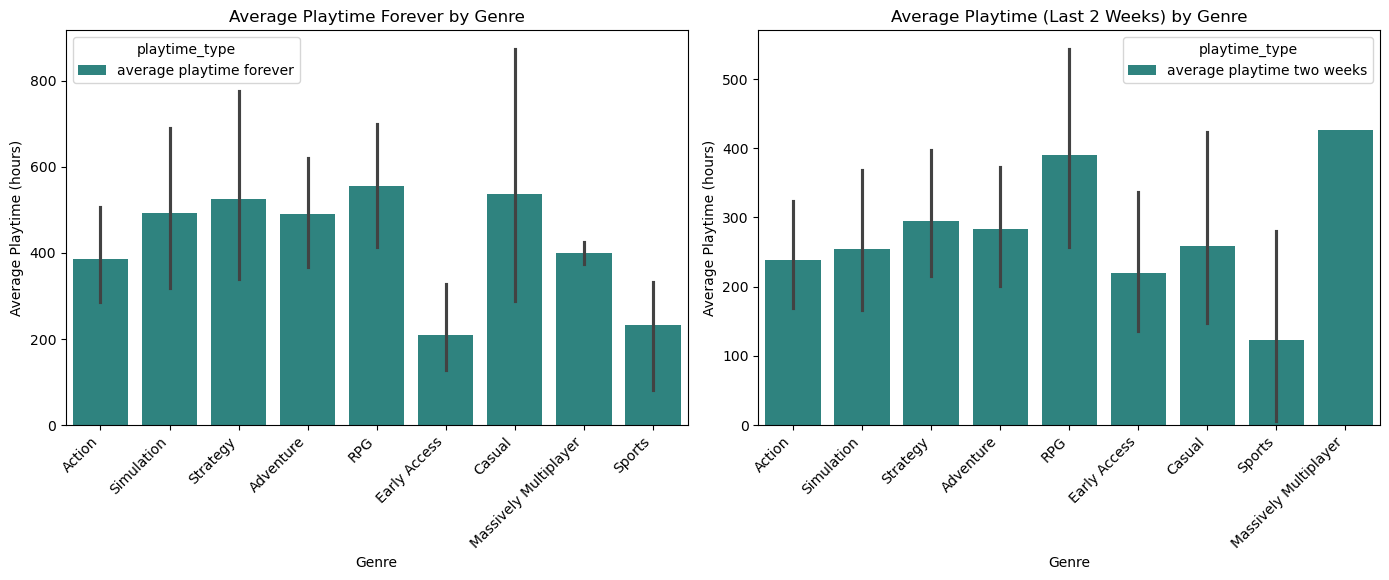

In [62]:
# Check the columns in indie_df to make sure we have the right playtime columns
print(indie_df.columns)

# List of playtime columns to be checked
playtime_columns = ['average playtime forever', 'average playtime two weeks',
                    'median playtime forever', 'median playtime two weeks']

# Check if the required columns exist in indie_df
missing_columns = [col for col in playtime_columns if col not in indie_df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All playtime columns are present.")

# Proceed if all columns are present
if not missing_columns:
    # Melt the DataFrame for each playtime column, creating a long-format DataFrame
    melted_df = indie_df.melt(id_vars=['name'],
                              value_vars=playtime_columns,
                              var_name='playtime_type',
                              value_name='playtime')

    # Filter out rows where 'playtime' is zero or missing
    melted_df = melted_df[melted_df['playtime'] > 0]  # Keep only rows where playtime > 0

    # Now, we need to map each game to its genres. This is a bit tricky since each game can belong to multiple genres.
    # Assuming you have genre columns where each genre is a separate column, we'll keep track of them.
    genre_columns = ['Early Access', 'Simulation', 'Sports', 'Action',
                     'Strategy', 'Adventure', 'RPG', 'Massively Multiplayer', 'Casual']

    # Create a new DataFrame with 'name' and the genre columns
    genre_df = indie_df[['name'] + genre_columns]  # Include the 'name' column here

    # Create a genre column that combines all genre columns (a one-hot encoding style)
    # Convert the genre columns into a single "genre" column with corresponding game names
    genre_melted = genre_df.melt(id_vars=['name'], var_name='genre', value_name='is_genre')

    # Only keep rows where 'is_genre' is 1, i.e., where the game belongs to the genre
    genre_melted = genre_melted[genre_melted['is_genre'] == 1]

    # Merge the playtime data with genre data based on the 'name' column
    merged_df = pd.merge(melted_df, genre_melted[['name', 'genre']], on='name', how='left')

    # Now, let's plot the data for each of the playtime variables for each genre
    plt.figure(figsize=(14, 10))

    # Plot for Average Playtime Forever
    plt.subplot(2, 2, 1)
    sns.barplot(x='genre', y='playtime', hue='playtime_type', data=merged_df[merged_df['playtime_type'] == 'average playtime forever'], palette='viridis')
    plt.title('Average Playtime Forever by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Average Playtime (hours)')
    plt.xticks(rotation=45, ha='right')

    # Plot for Average Playtime 2 Weeks
    plt.subplot(2, 2, 2)
    sns.barplot(x='genre', y='playtime', hue='playtime_type', data=merged_df[merged_df['playtime_type'] == 'average playtime two weeks'], palette='viridis')
    plt.title('Average Playtime (Last 2 Weeks) by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Average Playtime (hours)')
    plt.xticks(rotation=45, ha='right')

    # Adjust layout for better spacing
    plt.tight_layout()

    # Save the figure with a transparent background
    plt.savefig(r'..\figures\playtime_by_genre_cfge.png', format='png', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()
else:
    print("Please fix missing columns and try again.")